# Arctic ice maps

## Introduction

The purpose of this project is to become familiar with working on image data, plotting it, and combining it in various ways for analysis.

The data used in this problem set was/is collected by two different satellite missions. Involved are the AMSR-E instrument on the [Aqua](http://en.wikipedia.org/wiki/Aqua_%28satellite%29) satellite (data from 2002 to 2011) and the AMSR2 instrument on the [GCOM-W](https://suzaku.eorc.jaxa.jp/GCOM_W/) satellite (data from 2013 to-date). The data consist of maps of the concentration of ice in the Arctic collected between 2002 and 2022 with the exception of 2012. All the data were already downloaded and transformed to an easy-to-use format from [here](https://seaice.uni-bremen.de/start/data-archive/). The data is a (small) subset of the complete satellite data set, with only two ice maps every month (some are missing though).

**Note:** There is an ice-map for each first and each 15th of a month from the years 2003-2011 and 2013-2022 (a small amount of data is missing). For instance, the file `20080415.npy` represents data for the 15th of April 2008.

## 1. Getting familiar with the data and examining a single map

The data will be loaded from dropbox on intial  startup.
We start off by reading in some  map, and plot it with Matplotlib. In order to get the correct orientation, we used the ``imshow`` command with the ``origin='lower'`` option, which ensures that the (0,0) pixels is on the bottom left, not the top left. We also used colormaps (set by the ``cmap`` option) - from [here](https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html). We specified a colormap to use with e.g. ``cmap=plt.cm.jet`` (i.e. ``cmap=plt.cm.`` followed by the name of the colormap).

**Remarks:** (1) When exploring the data-values, we will notice that they contain numbers from 0 to 100. A value of 50 means that 50% of the area occupied by the corresponding pixel are covered with ice. A value of zero means that the complete pixel is covered with water; (2) Besides the numbers, a good deal of the pixels contains the special value `nan` (not a number). These are areas covered by land. Functions like `imshow` automatically ignore these values and do not produce an error. If we intend to do numerical calculations (`numpy`) with pixels that have a `nan`-value, the result is `nan` again by default. To ignore `nan`-values for building sums etc., we would need to use functions as `np.nansum` instead of `np.sum` etc.

In [76]:
import dropbox
import zipfile
import os
import pathlib

dataDir = 'arcticIceData'
if os.path.exists(f'./{dataDir}'):
    print('Datafolder exists')
else:
    zipFile = 'arcticData.zip'
    dbx = dropbox.Dropbox(app_key='947gw5y21y8yrmg',
                          app_secret='lg9rfcrfevpxg13',
                          oauth2_refresh_token='biFe-qMUGeQAAAAAAAAAARGSOBsIif-BJiMdnxfa0Qrd8SOMYGPUr7pC_o_wHpZo'
                        )
    dbx.files_download_zip_to_file(zipFile,f'/{dataDir}')
    with zipfile.ZipFile(zipFile, 'r') as zip_ref:
        zip_ref.extractall()
    pathlib.Path(zipFile).unlink()
    print('Datafolder created')


Datafolder exists


## 2. Reading in and examining multiple maps

We now want to make a plot of the ice concentration over time. Reading in a single map is easy, but since we have more than 350 maps, we do not want to read them all in individually by hand. We write a loop over all the available files, and inside the loop, read in the data to a variable (e.g. ``data``), and also extract the year, month, and day as integer values (e.g. ``year``, ``month``, and ``day``) from the filename. Then, also inside the loop, construct an array ``times`` which is essentially the fractional time in years. We assume for simplicity that each month has 30 days and each year has 360 days. As an example, in the year 2003, we would put the 1st of January as $2003.00$, the 2nd of January as $2003 + \frac{1}{360}\approx 2003.033$ and the 1st of February as $2003 + \frac{1}{12}\approx 2003.083$ into the `times`-array. Finally, we also compute for each file the total number of pixels that have a value above 50% ice. We p also those values into an array. After the loop, we make a plot of the number of pixels with a concentration above 50% against time.

To loop over files, we use the`glob`-module. An example is shown in the following code cell:

In [52]:
# The glob-module allows you to use Linux style
# pathname expansion
import glob

# generate a list of files matching the Unix-pattern
# /home/share/Project_2/ice_data/2*. These are all
# necessary ice-data files for the project:
datapath = f"./{dataDir}/data"
filelist = glob.glob(f"{datapath}/2*")

# print the first ten files:
print(filelist[:10])

['./arcticIceData/data\\20030101.npy', './arcticIceData/data\\20030115.npy', './arcticIceData/data\\20030201.npy', './arcticIceData/data\\20030215.npy', './arcticIceData/data\\20030301.npy', './arcticIceData/data\\20030315.npy', './arcticIceData/data\\20030401.npy', './arcticIceData/data\\20030415.npy', './arcticIceData/data\\20030501.npy', './arcticIceData/data\\20030515.npy']


We now want something a little more quantitative than just the number of pixels, so we will try and compute the area where the ice concentration is above a given threshold. However, we first need to know the area of the pixels in the image, and since we are looking at a projection of a spherical surface, each pixel will be a different area. The areas (in km$^{2}$) are contained inside the file named ``ice_data_area.npy``. We read in the areas and make a plot (with colorbar) to see how the pixel area is changing over the image.

Now, we loop over the files again as before, but this time, for each file, we compute the total area where the concentration of ice is 99% or above. We made a new plot showing the area of >99% ice concentration against time. Also plotted the *total area* covered by ice as a function of time.

*How does the minimum value within each year change over time?*

## 3. Visualizing changes over time; does the amount of ice decrease?

In the following we always work with the *total area* covered by ice from the previous task.

*What is the date at which the area of the region covered with ice is the smallest. What is the value of the minimum area?*

Next, we read in the map for this minimum, and the map for the same day and month but from 2003 and made a side-by-side plot showing the two ice-concentrations.

We computed the difference between the two maps so that a loss in ice over time will correspond to a negative value, and a gain in ice will correspond to a positive value and make a plot of the difference, and use the ``RdBu`` colormap to highlight the changes (include a colorbar).


Finally, we plot the `mean` ice concentrations of the years 2004-2006 over the months January to December and compare it to the mean over the years 2019-2021. What was the loss of the ice over the past 15 years at the minimum values?

## Epilogue

The data that we have here cover the past twenty years and it is worth noting that the minimum ice coverage you found here was a record minimum - never before (in recorded history) had the size of the ice shelf been so small. This is part of a long term trend due to global warming. Many scientists believe that by ~2050, the Arctic will be completely ice-free for at least part of the summer.

Text(0.5, 1.0, 'Ice map from April, 2008')

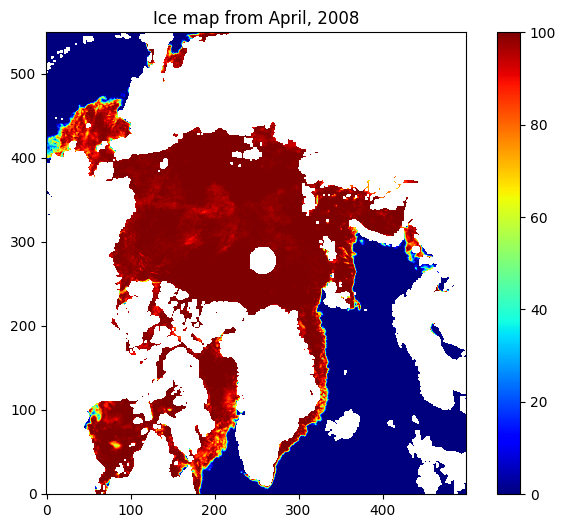

In [53]:
#Task 1

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#loading data for April 15, 2008
data = np.load(f'{datapath}/20080415.npy')

#plotting data with imshow
plt.figure(figsize=(8,6))
plt.subplot()
plt.imshow(data, origin = 'lower', cmap = plt.cm.jet)
plt.colorbar()
#plt.axis('off')
plt.title("Ice map from April, 2008")

Text(0.5, 1.0, 'icemap (>50% concentration) change with time')

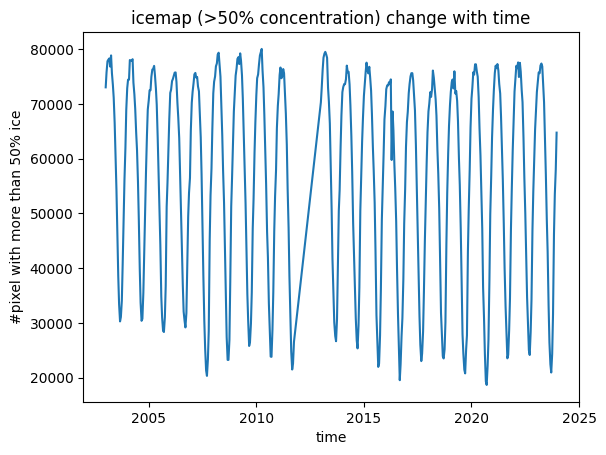

In [54]:
#Task 2

import glob  #importing for working with datapath
import os    #importing for working with filename
import re

#setting path to loop over files
filelist = glob.glob(f"{datapath}/2*")
#ensure file sorting is correct across systems
filelist = sorted(filelist)
#setting loop to read files one by one
times = []
num_pixel = []
months = []
for name in filelist:

    #splitting file name to extract times information
    file_name_ext = os.path.basename(name)
    file_name = os.path.splitext(file_name_ext)[0]
    year = int(file_name[:4])
    month = int(file_name[4:6])
    months = np.append(months,month)                 # used in task 3
    day = int(file_name[6:8])
    times = np.append(times, year + ((month - 1)*30 + (day -1))/360)

    #creating array for plotting
    data = np.load(name)
    mask50 = data>50
    nzero_data = data[np.nonzero(mask50)].shape[0]*1
    num_pixel.append(nzero_data)

#plotting
fig, ax = plt.subplots()

# ax.scatter(times, num_pixel)
ax.plot(times, num_pixel)
ax.set_xlabel('time')
ax.set_ylabel('#pixel with more than 50% ice')
ax.set_title('icemap (>50% concentration) change with time')

Text(0.5, 1.0, 'Area (in $km^2$) per pixel')

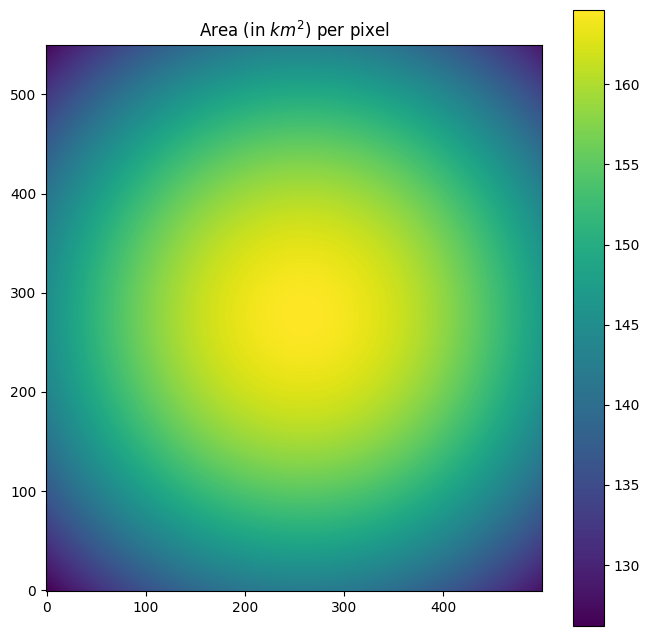

In [55]:
#Task 2 contd.

#loading area data
area_data = np.load(f'./{dataDir}/ice_data_area.npy')

#plotting area data
plt.figure(figsize=(8,8))
plt.subplot()
plt.imshow(area_data, origin = 'lower')  #set the cmap value to default to reduce the overwhelming colors
plt.colorbar()
plt.title("Area (in $km^2$) per pixel")

In [56]:
#Task 2 contd.

#creating two arrays for two plots
num_area = []
sum_area = []
nzero_area = []
total_area = []
for num in filelist:
    data = np.load(num)
    mask99 = data>= 99
    maskn0 = data > 0
    num_area = area_data[np.nonzero(mask99)]
    sum_area = np.append(sum_area, np.nansum(num_area)*1)            #sum of the area with over 99% ice
    nzero_area = area_data[np.nonzero(maskn0)]
    total_area = np.append(total_area, np.nansum(nzero_area)*1)      #sum of the total area with ice

Text(0.5, 1.0, 'icemap (area) change with time')

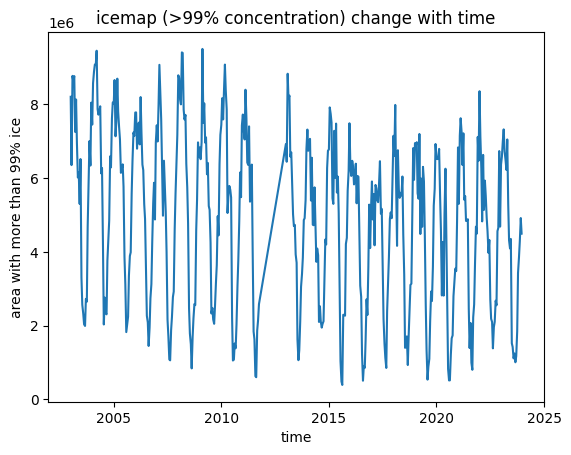

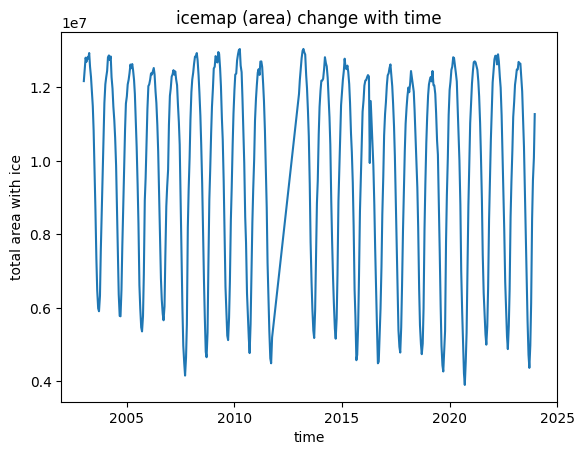

In [57]:
#Task 2 contd.
#split into a separate cell to avoid the heavy calculation in each step of editing

#plotting for area with over 99% ice vs time
fig1, ax1 = plt.subplots()

ax1.plot(times, sum_area)
ax1.set_xlabel('time')
ax1.set_ylabel('area with more than 99% ice')
ax1.set_title('icemap (>99% concentration) change with time')

#plotting for total area with ice vs time
fig2, ax2 = plt.subplots()

ax2.plot(times, total_area)
ax2.set_xlabel('time')
ax2.set_ylabel('total area with ice')
ax2.set_title('icemap (area) change with time')
#print(sum_area)

#### Task 2 contd.
In both of the graphs, there is a periodical changing pattern with each year which is expected with seasons changing, i.e, less ice in summer and more ice in winter. It can be seen in the total area icemap, that the minimum area with ice is decreasing with years passing by. What started from around 0.6e7 $km^2$ in 2003, has decreased to around 0.4e7 $km^2$. While the upper limit of the area is more or less consistent with each passing year for this graph, the graph for >99% ice area gradually declines as a whole. Which means, even though the amount of icy area is roughly the same in winters, the high concentration of the icy areas are decreasing with years.

In [58]:
#Task 3

#finding year information with minimum icy area
min_ice = np.argmin(total_area)
print(f'Lowest icy area over the years is',total_area[min_ice],'squared kilometers.')
file_min = filelist[min_ice]
print(f'The data for lowest icy area is stored in',file_min)

Lowest icy area over the years is 3900626.2023887634 squared kilometers.
The data for lowest icy area is stored in ./arcticIceData/data\20200915.npy


Text(0.5, 1.0, 'Ice map from Sep, 2003')

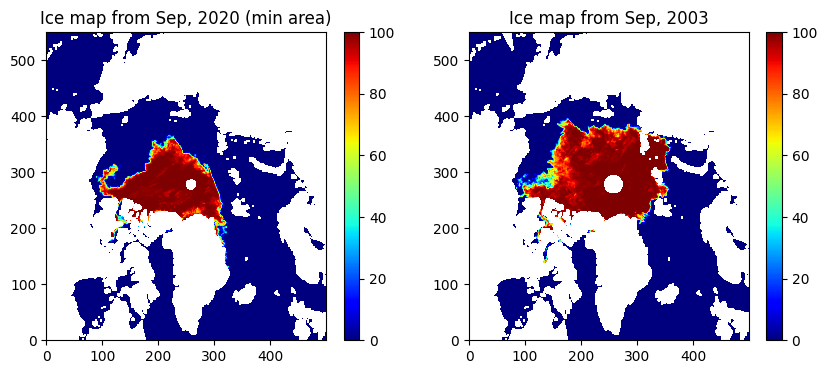

In [59]:
#Task 3 contd.
#loading minimum icy area file and file with the same date from 2003
data_min = np.load(file_min)
data_03 = np.load(f'{datapath}/20030915.npy')

#plotting
plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
plt.imshow(data_min, origin = 'lower', cmap = plt.cm.jet)
plt.colorbar()
plt.title("Ice map from Sep, 2020 (min area)")

plt.subplot(1,2,2)
plt.imshow(data_03, origin = 'lower', cmap = plt.cm.jet)
plt.colorbar()
plt.title("Ice map from Sep, 2003")

Text(0.5, 1.0, 'Difference in ice map between year 2003 and 2020')

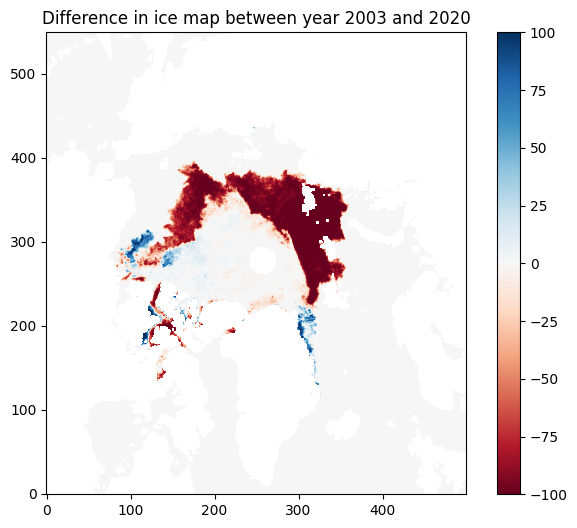

In [60]:
#Task 3 contd.
#plotting the difference between the two years
data_diff = data_min - data_03

plt.figure(figsize=(8,6))
plt.subplot()
plt.imshow(data_diff, origin = 'lower', cmap = 'RdBu')
plt.colorbar()
plt.title("Difference in ice map between year 2003 and 2020")

Lowest mean area of ice between 2004 and 2006 is 5645128.918797811 in Sep
Lowest mean area of ice between 2019 and 2021 is 4514786.71331342 in Sep
The loss of icy area over 15 years between 2004 and 2019 was 1130342.2054843903 squared kilometers


<function matplotlib.pyplot.show(close=None, block=None)>

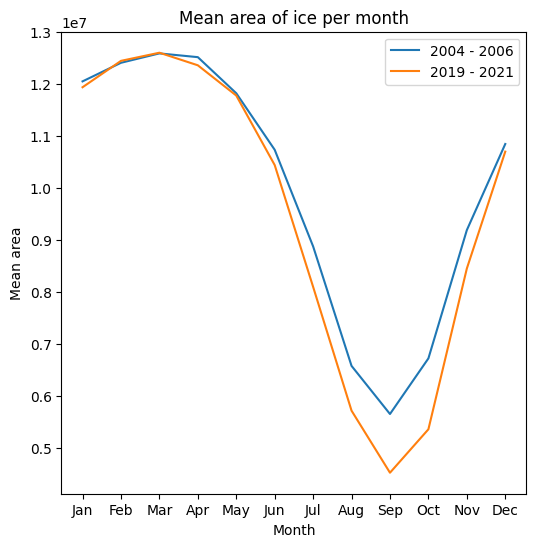

In [61]:
#Task 3 contd.

#setting up array variables
years = [2004,2019]
means = np.zeros(len(years))
mean_area = []
mean_month = []

#loop for masking
for year in years:
    mask_year = (times >= year) & ( times < year+3)
    mask_month= months[mask_year]
    mask_area = total_area[mask_year]

    # loop for sorting mean area over the months
    for i in range(13):
        for j in range(len(mask_month)):
            if mask_month[j]==i:
                mean_month = np.append(mean_month,mask_month[j])
                mean_area = np.append(mean_area,mask_area[j])

#constructing array with mean values over months
mean = mean_area.reshape(2,12,6)
output = np.mean(mean, axis=(2))

#indices with minimun value of mean over months
minind04 = np.argmin(output[0])
minind19 = np.argmin(output[1])

#constructing x axis array
month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#printing final result
ice_loss = output[0][minind04] - output[1][minind19]
print(f'Lowest mean area of ice between 2004 and 2006 is',output[0][minind04],'in',month_name[minind04])
print(f'Lowest mean area of ice between 2019 and 2021 is',output[1][minind19],'in',month_name[minind19])
print(f'The loss of icy area over 15 years between 2004 and 2019 was',ice_loss,'squared kilometers')

#plotting
plt.figure(figsize = (6,6))
plt.plot(month_name, output[0], label = '2004 - 2006')
plt.plot(month_name, output[1], label = '2019 - 2021')
plt.xlabel('Month')
plt.ylabel('Mean area')
plt.title('Mean area of ice per month')
plt.legend()
plt.show